In [1]:
import pandas as pd
import numpy as np
import tensorflow as ts
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [2]:
data=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/16.A_Neural Networks/forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
forest=data.drop(data.columns[11:30],axis=1)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [5]:
forest.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                    (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
forest.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
forest.size_category.replace(('small','large'),(0,1),inplace=True)

In [6]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [7]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [8]:
forest.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [9]:
print('Correlation',forest.corr(method='pearson'))

Correlation                   month       day      FFMC       DMC        DC       ISI  \
month          1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day           -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC           0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC            0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC             0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI            0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp           0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH            -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind          -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain           0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area           0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
size_category  0.080316  0.016796  0.022063  0.034715  0.019428 

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

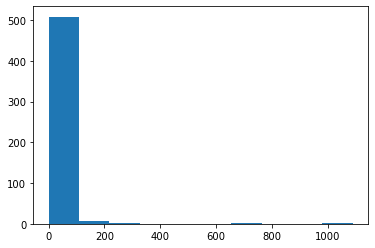

In [10]:
import matplotlib.pyplot as plt
plt.hist(forest.area)

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'size_category'}>]], dtype=object)

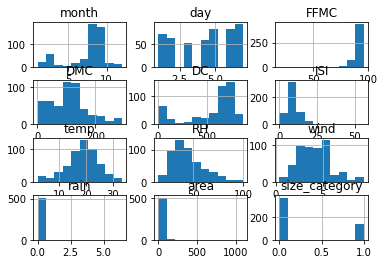

In [11]:
forest.hist()

In [12]:
#taking small as 0 and large as 1
forest.loc[forest['size_category']=='small','size_category']=0
forest.loc[forest['size_category']=='large','size_category']=1
forest['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [13]:
X=forest.iloc[:,0:11]
Y=forest.iloc[:,11]

In [14]:
#Standardisation
from sklearn.preprocessing import StandardScaler
a=StandardScaler()
a.fit(X)
X_standardised=a.transform(X)

In [15]:
pd.DataFrame(X_standardised).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-2.289164e-16,1.335704e-16,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-2.848033e+00,-1.573785e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-2.092640e-01,-1.090909e+00,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,2.305307e-01,3.577209e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,6.703255e-01,8.405974e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.989710e+00,1.323474e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


# Hyperparameter Tuning: batch size & epochs

In [16]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [17]:
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=11,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,bias_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [18]:
#create a model
model=KerasClassifier(build_fn=create_model,verbose=0)
#define the gridsearch parameters
batch_size=[10,20,30]
epochs=[10,40,80]
#dictionary of gridsearch parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
#build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=8)
grid_result=grid.fit(X_standardised,Y)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_18180/1994709121.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=10, epochs=10;, score=1.000 total time=   3.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.942 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.942 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.961 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=10, epochs=40;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=10, epochs=40;, score=0.971 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=10, epochs=40;, score=0.932 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=10, epochs=40;, score=0.961 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=10, epochs=40;, score=0.961 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=10, epochs=80;, score=1.000 total time=   8.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=10, epochs=80;, score=0.990 total time=   8.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=10, epochs=80;, score=0.981 total time=   8.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=10, epochs=80;, score=0.951 total time=   8.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=10, epochs=80;, score=0.942 total time=   8.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=20, epochs=10;, score=0.942 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=20, epochs=10;, score=0.904 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=20, epochs=10;, score=0.942 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=20, epochs=10;, score=0.903 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=20, epochs=10;, score=0.922 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=20, epochs=40;, score=1.000 total time=   2.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=20, epochs=40;, score=0.981 total time=   2.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=20, epochs=40;, score=0.932 total time=   2.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=20, epochs=40;, score=0.942 total time=   3.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=20, epochs=40;, score=0.961 total time=   3.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=20, epochs=80;, score=1.000 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=20, epochs=80;, score=0.971 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=20, epochs=80;, score=0.971 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=20, epochs=80;, score=0.961 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=20, epochs=80;, score=0.932 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=30, epochs=10;, score=1.000 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=30, epochs=10;, score=0.846 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=30, epochs=10;, score=0.835 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=30, epochs=10;, score=0.874 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=30, epochs=10;, score=0.932 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=30, epochs=40;, score=0.990 total time=   2.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=30, epochs=40;, score=0.990 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=30, epochs=40;, score=0.971 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=30, epochs=40;, score=0.942 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=30, epochs=40;, score=0.951 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..........batch_size=30, epochs=80;, score=0.990 total time=   3.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..........batch_size=30, epochs=80;, score=0.971 total time=   3.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..........batch_size=30, epochs=80;, score=0.971 total time=   3.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..........batch_size=30, epochs=80;, score=0.932 total time=   4.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..........batch_size=30, epochs=80;, score=0.961 total time=   3.6s


# Hyperparameter Tuning: learning rate & drop-out rate

In [19]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 8)
grid_result = grid.fit(X_standardised,Y)


C:\Users\lenovo\AppData\Local\Temp/ipykernel_18180/3241619381.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)
C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.827 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.777 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.893 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.883 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.942 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.951 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.913 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.883 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.779 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.961 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.874 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.893 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.875 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.942 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.835 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.874 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.534 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.728 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.788 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.524 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.680 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.854 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.990 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.798 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.922 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.709 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.864 total time=   1.3s


In [20]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9379761099815369, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8760642170906067,0.07482962170615999 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9379761099815369,0.03913688443667574 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9014002919197083,0.07634521514411888 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9050970792770385,0.058577166874084256 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7383495092391967,0.15094199011108292 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7693427920341491,0.16056722562893305 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8567214369773865,0.09753233358367391 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Hyperparameters tuning- activation function & kernel initialiser

In [22]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 8)
grid_result = grid.fit(X_standardised,Y)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_18180/3234330763.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)
C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_function=softmax, init=uniform;, score=0.923 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, init=uniform;, score=0.875 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, init=uniform;, score=0.951 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, init=uniform;, score=0.951 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, init=uniform;, score=0.874 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, init=normal;, score=0.981 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, init=normal;, score=0.856 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, init=normal;, score=0.913 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, init=normal;, score=0.903 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, init=normal;, score=0.854 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, init=zero;, score=1.000 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, init=zero;, score=0.750 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, init=zero;, score=0.524 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, init=zero;, score=0.680 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, init=zero;, score=0.699 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=relu, init=uniform;, score=1.000 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=relu, init=uniform;, score=0.933 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=relu, init=uniform;, score=0.942 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=relu, init=uniform;, score=0.883 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=relu, init=uniform;, score=0.893 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=relu, init=normal;, score=0.981 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=relu, init=normal;, score=0.798 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=relu, init=normal;, score=0.961 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=relu, init=normal;, score=0.893 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=relu, init=normal;, score=0.903 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=relu, init=zero;, score=1.000 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=relu, init=zero;, score=0.750 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=relu, init=zero;, score=0.524 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=relu, init=zero;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=relu, init=zero;, score=0.699 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=tanh, init=uniform;, score=0.971 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=tanh, init=uniform;, score=0.952 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=tanh, init=uniform;, score=0.951 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=tanh, init=uniform;, score=0.913 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=tanh, init=uniform;, score=0.874 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=tanh, init=normal;, score=0.971 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=tanh, init=normal;, score=0.952 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=tanh, init=normal;, score=0.951 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=tanh, init=normal;, score=0.913 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=tanh, init=normal;, score=0.922 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=tanh, init=zero;, score=1.000 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=tanh, init=zero;, score=0.750 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=tanh, init=zero;, score=0.524 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=tanh, init=zero;, score=0.680 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=tanh, init=zero;, score=0.699 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=linear, init=uniform;, score=0.990 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=linear, init=uniform;, score=0.913 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=linear, init=uniform;, score=0.592 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=linear, init=uniform;, score=0.961 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=linear, init=uniform;, score=0.893 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=linear, init=normal;, score=1.000 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=linear, init=normal;, score=0.942 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=linear, init=normal;, score=0.922 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=linear, init=normal;, score=0.971 total time=   1.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=linear, init=normal;, score=0.893 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=linear, init=zero;, score=1.000 total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=linear, init=zero;, score=0.750 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=linear, init=zero;, score=0.524 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=linear, init=zero;, score=0.680 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=linear, init=zero;, score=0.699 total time=   1.1s


In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9457430839538574, using {'activation_function': 'linear', 'init': 'normal'}
0.9149551868438721,0.034704216521861946 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9012882709503174,0.04630703598582758 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.930227768421173,0.041380311932880824 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9072255373001099,0.06394806318882612 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9321882009506226,0.034850191966144285 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.941896939277649,0.021390616532830312 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8700896263122558,0.14309809413113508 with: {'activ

# Hyperparameters tuning- number of neurons in activation layer

In [24]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 8)
grid_result = grid.fit(X_standardised,Y)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_18180/957584870.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)
C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............neuron1=4, neuron2=2;, score=1.000 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..............neuron1=4, neuron2=2;, score=0.875 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..............neuron1=4, neuron2=2;, score=0.971 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..............neuron1=4, neuron2=2;, score=0.893 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..............neuron1=4, neuron2=2;, score=0.903 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..............neuron1=4, neuron2=4;, score=1.000 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..............neuron1=4, neuron2=4;, score=0.933 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..............neuron1=4, neuron2=4;, score=0.922 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..............neuron1=4, neuron2=4;, score=0.913 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..............neuron1=4, neuron2=4;, score=0.854 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..............neuron1=4, neuron2=8;, score=1.000 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..............neuron1=4, neuron2=8;, score=0.837 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..............neuron1=4, neuron2=8;, score=0.961 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..............neuron1=4, neuron2=8;, score=0.913 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..............neuron1=4, neuron2=8;, score=0.942 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..............neuron1=8, neuron2=2;, score=1.000 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..............neuron1=8, neuron2=2;, score=0.942 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..............neuron1=8, neuron2=2;, score=0.942 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..............neuron1=8, neuron2=2;, score=0.922 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..............neuron1=8, neuron2=2;, score=0.874 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..............neuron1=8, neuron2=4;, score=0.990 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..............neuron1=8, neuron2=4;, score=0.913 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..............neuron1=8, neuron2=4;, score=0.942 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..............neuron1=8, neuron2=4;, score=0.942 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..............neuron1=8, neuron2=4;, score=0.951 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END ..............neuron1=8, neuron2=8;, score=1.000 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END ..............neuron1=8, neuron2=8;, score=0.933 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END ..............neuron1=8, neuron2=8;, score=0.951 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END ..............neuron1=8, neuron2=8;, score=0.961 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END ..............neuron1=8, neuron2=8;, score=0.903 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END .............neuron1=16, neuron2=2;, score=0.990 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END .............neuron1=16, neuron2=2;, score=0.923 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END .............neuron1=16, neuron2=2;, score=0.845 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END .............neuron1=16, neuron2=2;, score=0.913 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END .............neuron1=16, neuron2=2;, score=0.883 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END .............neuron1=16, neuron2=4;, score=1.000 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END .............neuron1=16, neuron2=4;, score=0.904 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END .............neuron1=16, neuron2=4;, score=0.874 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END .............neuron1=16, neuron2=4;, score=0.932 total time=   1.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END .............neuron1=16, neuron2=4;, score=0.854 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END .............neuron1=16, neuron2=8;, score=1.000 total time=   1.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END .............neuron1=16, neuron2=8;, score=0.952 total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END .............neuron1=16, neuron2=8;, score=0.874 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END .............neuron1=16, neuron2=8;, score=0.893 total time=   1.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END .............neuron1=16, neuron2=8;, score=0.883 total time=   1.2s


In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9496452569961548, using {'neuron1': 8, 'neuron2': 8}
0.928398048877716,0.048312558909427025 with: {'neuron1': 4, 'neuron2': 2}
0.9244025349617004,0.04654351503868058 with: {'neuron1': 4, 'neuron2': 4}
0.9304144859313965,0.054855242694332895 with: {'neuron1': 4, 'neuron2': 8}
0.9360343456268311,0.04056159653232999 with: {'neuron1': 8, 'neuron2': 2}
0.9477595210075378,0.02481614097196315 with: {'neuron1': 8, 'neuron2': 4}
0.9496452569961548,0.032071572871265705 with: {'neuron1': 8, 'neuron2': 8}
0.9108476638793945,0.04818250420588837 with: {'neuron1': 16, 'neuron2': 2}
0.9128080606460571,0.05097135783525872 with: {'neuron1': 16, 'neuron2': 4}
0.9204816937446594,0.04817521667099527 with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of hyperparameters

In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)

# Fitting the model

model.fit(X_standardised,Y)

# Predicting using trained model

y_predict = model.predict(X_standardised)

# Printing the metrics
print(accuracy_score(Y,y_predict))

C:\Users\lenovo\AppData\Local\Temp/ipykernel_18180/524998456.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 30,epochs = 10)


0.9748549323017408


# Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,30]
epochs = [10,40,80]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 8)
grid_result = grid.fit(X_standardised,Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

C:\Users\lenovo\AppData\Local\Temp/ipykernel_18180/2642292871.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.301 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.250 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.320 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   2.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.904 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.874 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.981 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.894 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.961 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.922 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.951 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.874 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.913 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.825 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.942 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.894 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.816 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.883 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.981 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.942 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.933 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.835 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.894 total time=   2.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.854 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.893 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.893 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.913 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.864 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.883 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.971 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.923 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.913 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.846 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.845 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.942 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.875 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.922 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.913 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.913 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.981 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.808 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.942 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.990 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.788 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.845 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.932 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.981 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.962 total time=   2.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.767 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.913 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.835 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.942 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.779 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.854 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.796 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.962 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.837 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.854 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.913 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.933 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.817 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.767 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.845 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   2.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.981 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.942 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.952 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.961 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.903 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.904 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.981 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.808 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.864 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.990 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.904 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.903 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.981 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.933 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.932 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.893 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.990 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.933 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.796 total time=   2.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.893 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.903 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.990 total time=   2.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.856 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.825 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.893 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.874 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.865 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.845 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.990 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.846 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.883 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.845 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.971 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.885 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.825 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.942 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.835 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.990 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.875 total time=   3.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.922 total time=   2.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.913 total time=   2.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.806 total time=   2.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.981 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.875 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.806 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.893 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.854 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.971 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.885 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.825 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.913 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.874 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.990 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.837 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.825 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.922 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.806 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.971 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.904 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.854 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.816 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.825 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.942 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.817 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.748 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.767 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.845 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.856 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.845 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.903 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.806 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   2.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.301 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.476 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.301 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   2.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   2.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.750 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.524 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.699 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.680 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.750 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   2.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.680 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   2.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   2.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   1.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   2.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   3.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   5.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   5.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.738 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   5.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   5.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.738 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.689 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.738 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   5.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   5.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   5.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   5.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   4.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.728 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.981 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.961 total time=   5.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.961 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.951 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.990 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.951 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.971 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.990 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.951 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   5.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.922 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.932 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.942 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   6.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.990 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.913 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.951 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.922 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.990 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.942 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.932 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.942 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.971 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.942 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.932 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.893 total time=   5.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.971 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.961 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.951 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.932 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.932 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.932 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.951 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.990 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.961 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.932 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.981 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.923 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.961 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.971 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.962 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.981 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.961 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.922 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.990 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.865 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.951 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.893 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.913 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.932 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.913 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.825 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.913 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.942 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.922 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.961 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.981 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.856 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.835 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.883 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.922 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.923 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.864 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.893 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.874 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.981 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.846 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.854 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.922 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.709 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.738 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.738 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.689 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.738 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.738 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.971 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.981 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.990 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.961 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.990 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.922 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.951 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.981 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.932 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.961 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.961 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.962 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.942 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.951 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.932 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.990 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.962 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.981 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.951 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.922 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.962 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.932 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.942 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.962 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.961 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.951 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.865 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.971 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.961 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.971 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.990 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.932 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.933 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.971 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.971 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.922 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.874 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.951 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.990 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.827 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.922 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.932 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.798 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.760 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.864 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.893 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.796 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.942 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.865 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.913 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.922 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.932 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   4.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.865 total time= 5.1min


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.854 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.922 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.874 total time=   6.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   3.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   3.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   3.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   3.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   3.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   3.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   3.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   4.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   5.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   5.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.750 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.524 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=   4.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   4.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   3.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.524 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.680 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.699 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.680 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.699 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.524 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.680 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=   5.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   4.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   4.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.524 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.680 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.524 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.680 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.699 total time=   6.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   5.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.750 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   5.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   4.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   5.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=   5.3s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.524 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.680 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   5.1s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.680 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   4.9s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   5.4s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   4.8s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   5.0s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   4.7s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=40, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   4.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=80, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.990 total time=   8.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=80, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.856 total time=   9.2s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=80, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.864 total time=   8.5s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=80, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.883 total time=   8.6s


C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
